In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append(os.path.abspath("../src"))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Prepare data

In [47]:
# take results for a modela acress datasets
# average across tasks
# def prepare_data_1(files, datasets, store_path, model_name):
#     plot_data = []
#     store_data = []
#     for f, d in zip(files, datasets):
#         df = pd.read_csv(f, index_col=0)
#         arr = df["acc"].to_numpy()
#         arr = arr.reshape((3, -1))
#         avg, var = np.mean(arr, axis=1), np.std(arr, axis=1)
#         plot_data.append((avg, var))
#         store_data.append((d, avg, var))
    
#     s_data = pd.DataFrame(store_data, columns=['dataset', 'avg', 'var'])
#     s_data.to_csv(f"{store_path}/result_{model_name}_rb_1.csv")
#     return plot_data


def prepare_data_1(files, datasets):
    plot_data = []
    for f, d in zip(files, datasets):
        df = pd.read_csv(f, index_col=0)
        arr = df["acc"].to_numpy()
        arr = arr.reshape((3, 3, -1))
        avg, var = np.mean(arr, axis=1), np.std(arr, axis=1)
        row = np.concatenate((avg[:, None], var[:, None]), axis = 1)
        plot_data.append(row)
    return np.array(plot_data)



## Test Plot

In [4]:
from rbias.constants import DATASETS, C_LADDERS
from rbias.process import prep_taskwise_across_data_rungs
from rbias.viz import multi_bar_plots


/Users/tejaskasetty/miniconda3/envs/causal/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [55]:
datasets = [ "rchar", "cs", "adv" ]
c_rungs = ["obs", "inter", "sub"]

#model_name = "gpt-3.5-turbo"
#model_name = "gpt-4-turbo"
model_name = "gpt-4"
#model_name = "llama-2-7b"


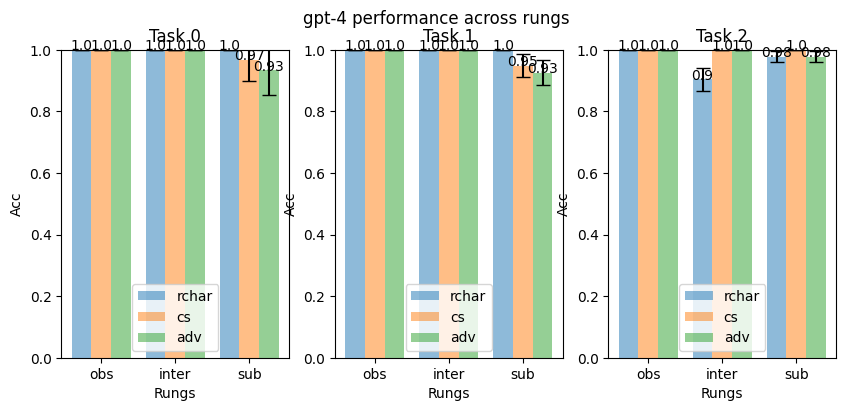

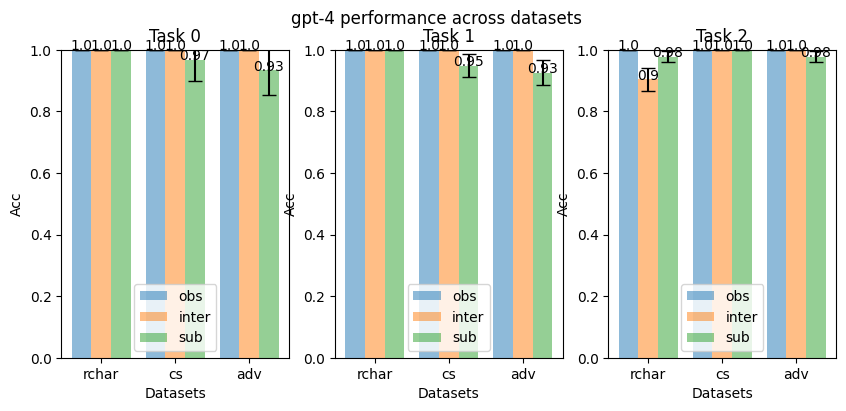

In [56]:
res_files = [f"../experiments/results/result_rchar_1710342923/{model_name}_1/results.csv",
         f"../experiments/results/result_cs_1710342947/{model_name}_1/results.csv",
         f"../experiments/results/result_adv_1710343186/{model_name}_1/results.csv"]

# res_files = [f"../experiments/results/result_rchar_1709153316/{model_name}_1/results.csv",
#          f"../experiments/results/result_cs_1709555994/{model_name}_1/results.csv",
#          f"../experiments/results/result_adv_1709680459/{model_name}_1/results.csv"]

rung_sup_title = f"{model_name} performance across rungs"
data_sup_title = f"{model_name} performance across datasets"
titles = [ f"Task {i}" for i in range(3)]
# data preparation
res_arungs, res_adata = prep_taskwise_across_data_rungs(res_files)
# plot multi_plot bars
multi_bar_plots(res_arungs, labels = DATASETS, x_tick_labels=C_LADDERS, x_label="Rungs", y_label="Acc", 
                titles=titles, sup_title=rung_sup_title, yerr = True) # comparison across different rungs
multi_bar_plots(res_adata, labels = C_LADDERS, x_tick_labels=DATASETS, x_label="Datasets", y_label="Acc", 
                titles=titles, sup_title=data_sup_title, yerr = True) # comparison across different datasets 

#### Model Comparison

In [57]:
res_adata

array([[[[1.        , 0.        ],
         [1.        , 0.        ],
         [1.        , 0.        ]],

        [[1.        , 0.        ],
         [1.        , 0.        ],
         [0.96666667, 0.06666667]],

        [[1.        , 0.        ],
         [1.        , 0.        ],
         [0.93333333, 0.08164966]]],


       [[[1.        , 0.        ],
         [1.        , 0.        ],
         [1.        , 0.        ]],

        [[1.        , 0.        ],
         [1.        , 0.        ],
         [0.94814815, 0.03777051]],

        [[1.        , 0.        ],
         [1.        , 0.        ],
         [0.92592593, 0.04057204]]],


       [[[1.        , 0.        ],
         [0.9037037 , 0.03777051],
         [0.97777778, 0.01814437]],

        [[1.        , 0.        ],
         [1.        , 0.        ],
         [1.        , 0.        ]],

        [[1.        , 0.        ],
         [1.        , 0.        ],
         [0.97777778, 0.01814437]]]])

In [58]:
res_adata[:, :, 0, 1],res_adata[:, :, 1, 1]

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.03777051, 0.        , 0.        ]]))

In [59]:
oi_avg = res_adata[:, :, 0, 0] - res_adata[:, :, 1, 0]
print("OI avg - rchar,    cs,        adv")
oi_avg

OI avg - rchar,    cs,        adv


array([[0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       ],
       [0.0962963, 0.       , 0.       ]])

In [61]:
oi_std = res_adata[:, :, 0, 1] + res_adata[:, :, 1, 1]
print("OI Std - rchar,    cs,        adv")
oi_std

OI Std - rchar,    cs,        adv


array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.03777051, 0.        , 0.        ]])

In [62]:
cs_adv_diff = oi_avg[:, 1] - oi_avg[:, 2]
print("cs-adv - diff avg")
cs_adv_diff

cs-adv - diff avg


array([0., 0., 0.])

### Query Success logs

In [ ]:
def prepare_query_log(files):
    plot_data = []
    for f, d in zip(files, datasets):
        df = pd.read_csv(f, index_col=0)
        arr = df["acc"].to_numpy()
        arr = arr.reshape((3, -1))
        avg, var = np.mean(arr, axis=1), np.std(arr, axis=1)
        row = np.concatenate((avg[:, None], var[:, None]), axis = 1)
        plot_data.append(row)
    return np.array(plot_data)


In [ ]:
files = [f"../experiments/results/result_rchar_1709153316/{model_name}_2/query_log.csv",
         f"../experiments/results/result_cs_1709555994/{model_name}_2/query_log.csv",
         f"../experiments/results/result_adv_1709680459/{model_name}_1/query_log.csv"]


In [12]:
f = "../experiments/results/result_rchar_1709153316/gpt-3.5-turbo_2/results.csv"
df = pd.read_csv(f, index_col=0)
arr = df["acc"].to_numpy()
arr = arr.reshape((3, -1))
avg, var = np.mean(arr, axis=1), np.std(arr, axis=1)
avg, var

(array([0.88888889, 0.52222222, 0.57407407]),
 array([0.15843889, 0.02884771, 0.08142535]))

### Separate Interventions

In [70]:
from rbias.constants import DATASETS, TASKS, C_LADDERS
from rbias.process import prep_taskwise_obv_non_obv_inter
from rbias.viz import multi_bar_plots

In [88]:

#model_name = "gpt-3.5-turbo"
#model_name = "gpt-4-turbo"
#model_name = "gpt-4"
model_name = "llama-2-7b"

In [89]:
res_folders = [f"../experiments/results/result_rchar_1710342923/{model_name}_1/",
         f"../experiments/results/result_cs_1710342947/{model_name}_1/",
         f"../experiments/results/result_adv_1710343186/{model_name}_1/"]

titiles = [ f"Task {i}" for i in range(TASKS) ]
inter_title = f"{model_name} - Taskwise performance for intervention across datasets"
sub_title = f"{model_name} - Taskwise performance for substitution across datasets"
labels = ["no-change", "change"]
x_tick_labels = C_LADDERS

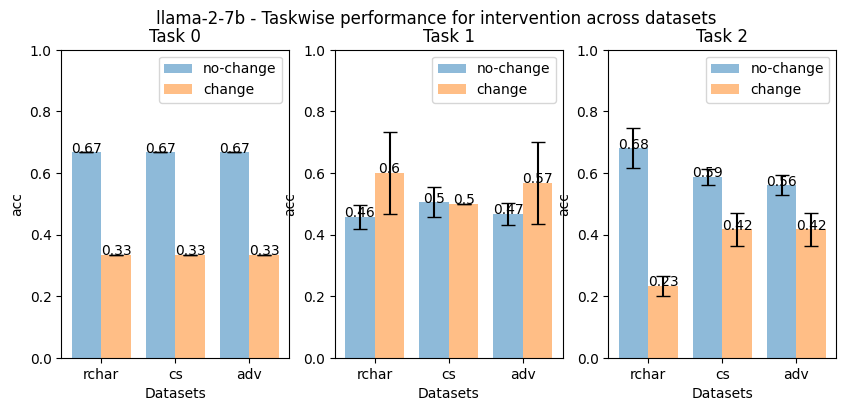

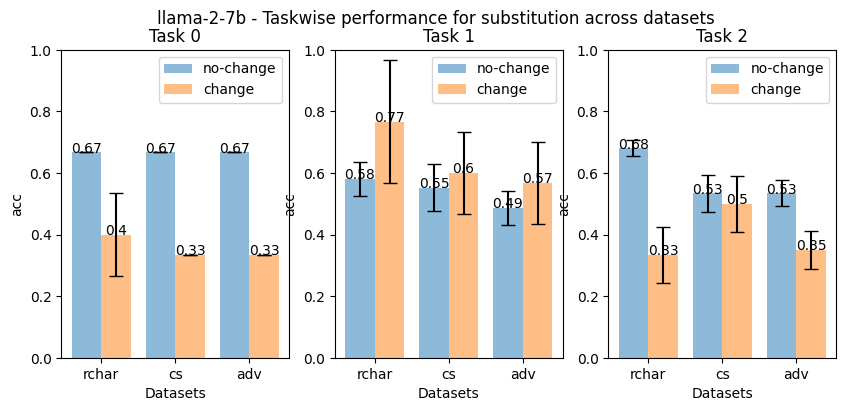

In [90]:
data = prep_taskwise_obv_non_obv_inter(res_folders)
multi_bar_plots(data[0], labels=labels, x_tick_labels=DATASETS, x_label = "Datasets", y_label = "acc",
                                 titles=titles, sup_title=inter_title)
multi_bar_plots(data[1], labels=labels, x_tick_labels=DATASETS, x_label = "Datasets", y_label = "acc",
                                 titles=titles, sup_title=sub_title)